In [58]:
import matplotlib.pyplot as plt
import xarray as xr
import datetime
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

print(datetime.datetime.ctime(datetime.datetime.today()))
print("Pandas   : ", pd.__version__)
print("Xarray   : ", xr.__version__)

Fri Oct 13 11:02:07 2023
Pandas   :  1.5.3
Xarray   :  2022.11.0


In [43]:
# Define the path to the NetCDF file
nc_file_path = "/Users/nikwr/Python Scripts/sst.mon.mean.nc"

# Open the NetCDF file and specify the time range directly
ds = xr.open_dataset(nc_file_path).sel(time=slice('2000-01-01', '2021-01-01'))
ds

<xarray.Dataset>
Dimensions:  (time: 253, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-01-01
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [44]:
ds = ds.groupby('time.month').mean()
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, month: 12)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lat, lon) float32 nan nan nan nan ... -1.748 -1.748 -1.748
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

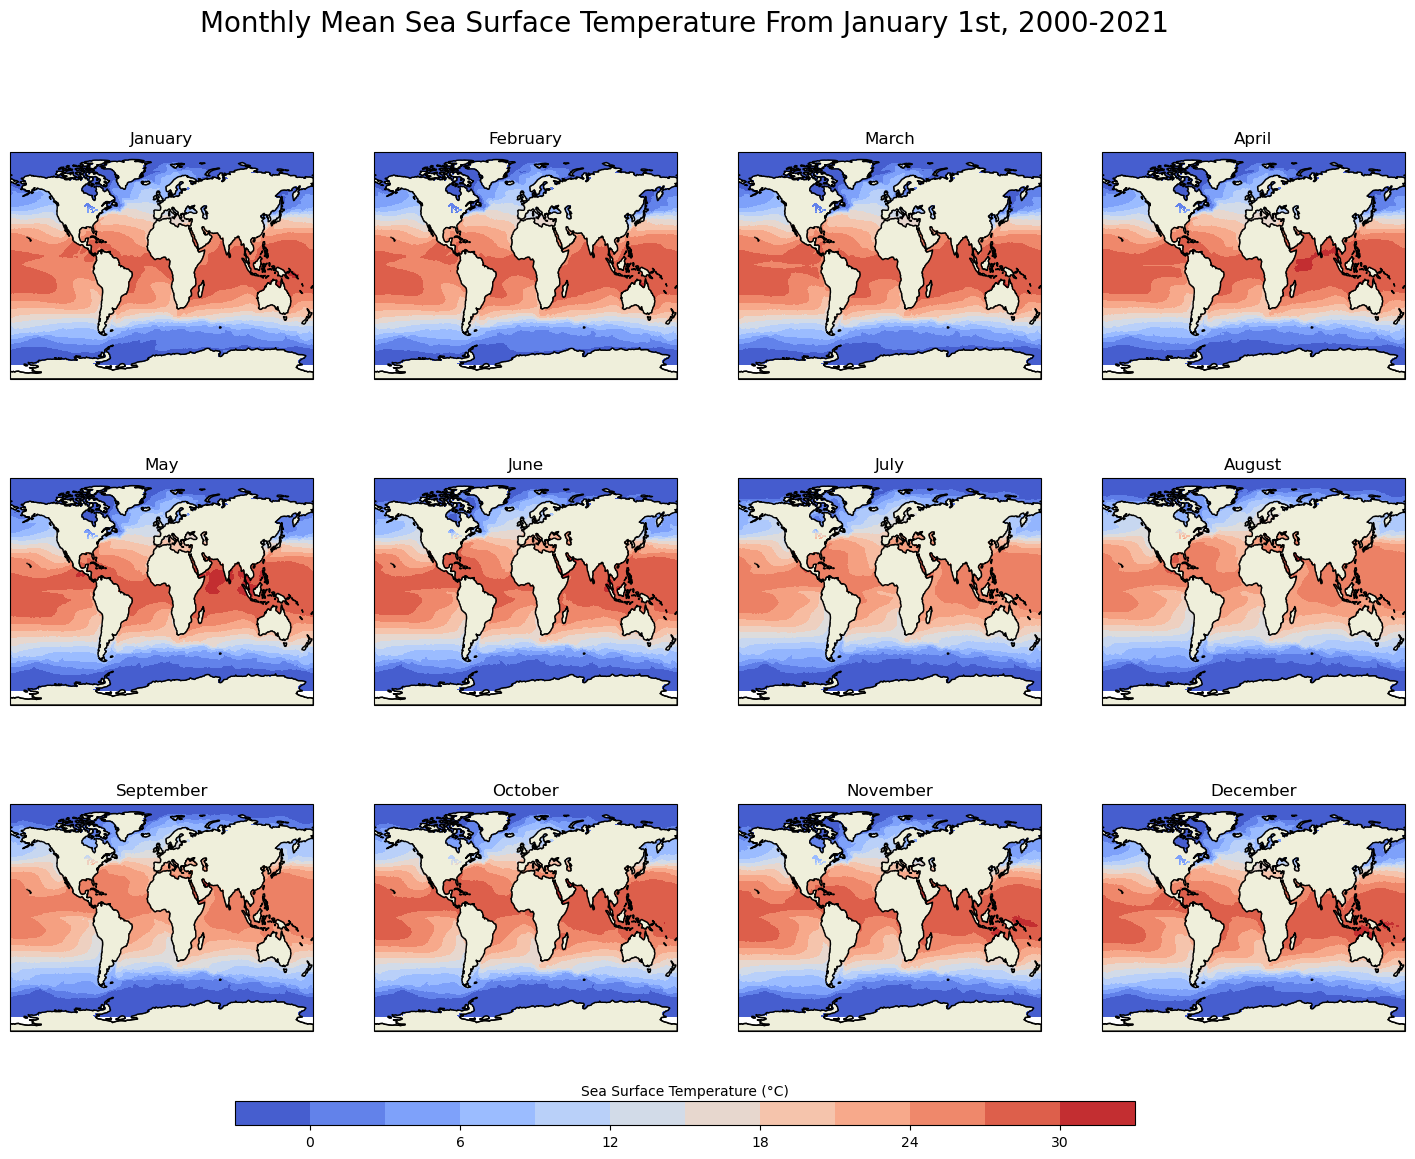

In [80]:
# Create a 12-panel contour plot for each month
fig, axs = plt.subplots(3, 4, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree(), 'aspect': '1.5'})
cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.02])  # [left, bottom, width, height]
for i, ax in enumerate(axs.flat):
    month_data = ds.isel(month=i)
    month_index = i + 1
    month_name = calendar.month_name[month_index]
    cs = ax.contourf(month_data['sst'].lon, month_data['sst'].lat, month_data['sst'], cmap='coolwarm', levels=12)
    ax.set_title(month_name)
    ax.coastlines()
    ax.add_feature(cfeature.LAND, edgecolor='black')

cbar = plt.colorbar(cs, cax=cbar_ax, orientation='horizontal')
cbar.ax.xaxis.set_label_position('top')
cbar.set_label('Sea Surface Temperature (°C)')

# Add a common title for the entire plot
fig.suptitle('Monthly Mean Sea Surface Temperature From January 1st, 2000-2021', fontsize=20)

plt.show()